In [2]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
from pathlib import Path
import mplhep as hep

hep.style.use(hep.style.ATLAS)

import re
import joblib
import logging
# from utils.utils import check_inputpath, check_outputpath, logging_setup

In [3]:
merged_sig = joblib.load("merged_decorated_sig.pkl")

In [4]:
sorted(merged_sig.columns)

['AvMu',
 'Channel',
 'CrossSection',
 'DY_jj',
 'Deta_jj',
 'Dphi_jj',
 'Eta_W',
 'Eta_Z',
 'EventNumber',
 'Ht',
 'Jet1E',
 'Jet1Eta',
 'Jet1Phi',
 'Jet1Pt',
 'Jet1Truth',
 'Jet1Y',
 'Jet2E',
 'Jet2Eta',
 'Jet2Phi',
 'Jet2Pt',
 'Jet2Truth',
 'Jet2Y',
 'Jet3E',
 'Jet3Eta',
 'Jet3Phi',
 'Jet3Pt',
 'Jet3Truth',
 'Jet3Y',
 'LTcode',
 'Lep1Charge',
 'Lep1D0Sig',
 'Lep1Eta',
 'Lep1Level',
 'Lep1Phi',
 'Lep1Pt',
 'Lep1WeightW',
 'Lep1WeightZ',
 'Lep2Charge',
 'Lep2D0Sig',
 'Lep2Eta',
 'Lep2Level',
 'Lep2Phi',
 'Lep2Pt',
 'Lep2WeightW',
 'Lep2WeightZ',
 'Lep3Charge',
 'Lep3D0Sig',
 'Lep3Eta',
 'Lep3Level',
 'Lep3Phi',
 'Lep3Pt',
 'Lep3WeightW',
 'Lep3WeightZ',
 'Luminosity',
 'M_123',
 'M_WZ',
 'M_Z',
 'M_jj',
 'Met',
 'Mt_W',
 'Mt_WZ',
 'NBjets',
 'Njets',
 'NormSF',
 'PtBalanceW',
 'PtBalanceZ',
 'Pt_123',
 'Pt_W',
 'Pt_WZ',
 'Pt_Z',
 'Sum3Pt',
 'SumOfWeight',
 'TopCR',
 'TopElCR',
 'TopMuCR',
 'TruthType',
 'WZInclusive',
 'WZInclusiveLoose',
 'WZVBSCR',
 'WZVBSSR',
 'WZqqCR',
 'WZqqSR',


# Branch Name exploration 

For a jet, several attributes are recorded, `E, Eta, Phi, Pt, Truth, Y`.    
For a lepton, they are 
```
 'Lep1Charge',
 'Lep1D0Sig',
 'Lep1Eta',
 'Lep1Level',
 'Lep1Phi',
 'Lep1Pt',
 'Lep1WeightW',
 'Lep1WeightZ',
```

### LTCode
``` cpp 
      if(m_pass_TTVA) m_LTcode = (m_Lep1Level>=122) * 2*2 + (m_Lep2Level>=122) * 2 + (m_Lep3Level>=123);
      else m_LTcode = -1;

``` 

In [5]:
np.unique(merged_sig['LTcode'])

array([7], dtype=int32)

# Pile Up Jet study 

## AvMu distribution

In [6]:
np.unique(merged_sig['Year'])

array([  17,   18, 1516], dtype=int32)

In [7]:
merged_sig_by_year = merged_sig.groupby('Year')

Year: 17, AvMu: 35.942386627197266
Year: 18, AvMu: 35.412864685058594
Year: 1516, AvMu: 22.518798828125


[]

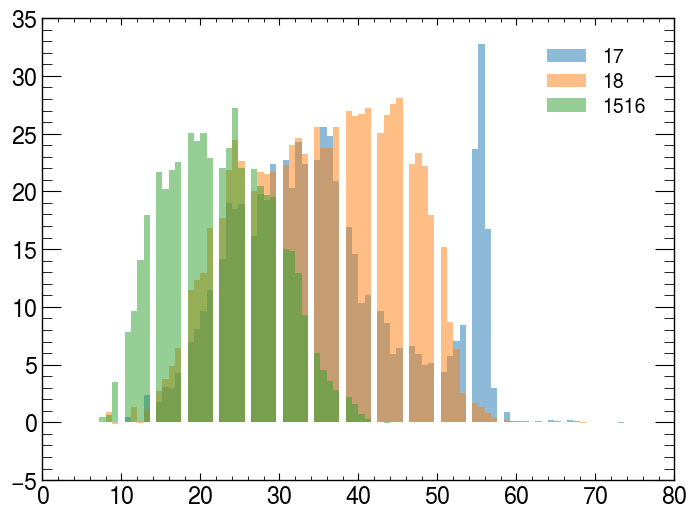

In [8]:
fig, ax = plt.subplots(figsize=(8, 6)) 
# AvMu_max = merged_sig['AvMu'].max()
# AvMu_min = merged_sig['AvMu'].min()
AvMu_max = 80
AvMu_min = 0
bin_edges = np.linspace(AvMu_min, AvMu_max, 101)

for year, year_df in merged_sig_by_year:
    print(f"Year: {year}, AvMu: {np.average(year_df['AvMu'], weights=year_df['WeightNormalized'])}")
    ax.hist(year_df['AvMu'], weights=year_df['WeightNormalized'],
             bins=bin_edges, histtype='stepfilled', alpha=0.5,
             label=year, density=False)

ax.legend()
ax.plot()

Year: 17, AvMu: 38.45370864868164
Year: 18, AvMu: 37.925384521484375
Year: 1516, AvMu: 23.377843856811523


[]

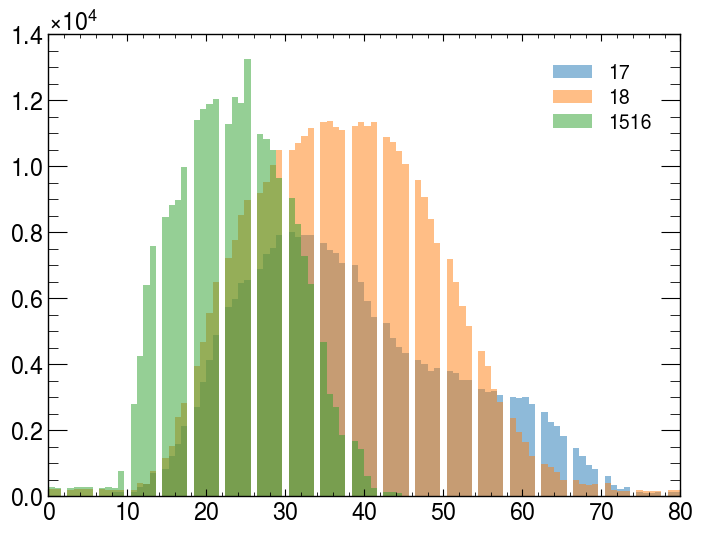

In [9]:
fig, ax = plt.subplots(figsize=(8, 6)) 
# AvMu_max = merged_sig['AvMu'].max()
# AvMu_min = merged_sig['AvMu'].min()
AvMu_max = 80
AvMu_min = 0
bin_edges = np.linspace(AvMu_min, AvMu_max, 101)

for year, year_df in merged_sig_by_year:
    print(f"Year: {year}, AvMu: {year_df['AvMu'].mean()}")
    ax.hist(year_df['AvMu'],
             bins=bin_edges, histtype='stepfilled', alpha=0.5,
             label=year, density=False)

ax.legend()
ax.plot()

## Compare with official 
Compared with the ATLAS luminosity   
![mu_2015_2018.png](https://atlas.web.cern.ch/Atlas/GROUPS/DATAPREPARATION/PublicPlots/2018/DataSummary/figs/mu_2015_2018.png)

## Feature studies 

### Jet?Truth

The `Jet?Truth` definition is:  
``` cpp
      m_Jet1Truth = -999;
      if(eventPtr->nGoodJets>0) m_Jet1Truth = (eventPtr->jets.at(eventPtr->nGoodJets-1).truthMatched);
      m_Jet2Truth = -999;
      if(eventPtr->nGoodJets>1) m_Jet2Truth = (eventPtr->jets.at(eventPtr->nGoodJets-2).truthMatched);
      m_Jet3Truth = -999;
      if(eventPtr->nGoodJets>2) m_Jet3Truth = (eventPtr->jets.at(eventPtr->nGoodJets-3).truthMatched);
```  

if `truthMatched` == 1, `Jet1Truth` == 1. 



In [10]:
np.unique(merged_sig['Jet1Truth'], return_counts=True)

(array([0, 1], dtype=int32), array([  6827, 861247]))

In [11]:
np.unique(merged_sig['Jet2Truth'], return_counts=True)

(array([0, 1], dtype=int32), array([ 34874, 833200]))

In [12]:
np.unique(merged_sig['Jet3Truth'], return_counts=True)

(array([-999,    0,    1], dtype=int32), array([637456,  42902, 187716]))

### JetTruth Stats

In [13]:
merged_sig['Event_JetTruth'] = merged_sig['Jet1Truth'] * merged_sig['Jet2Truth']

In [14]:
unique_values, counts = np.unique(merged_sig['Event_JetTruth'], return_counts=True)

In [15]:
yields = np.bincount(merged_sig['Event_JetTruth'], weights=merged_sig['WeightNormalized'])

In [16]:
stats = pd.DataFrame(columns=unique_values, data=[counts, yields], index=['counts', 'yields']).T

In [17]:
stats['count_frac'] = stats['counts'] / stats['counts'].sum()
stats['yield_frac'] = stats['yields'] / stats['yields'].sum()
print(stats)

     counts       yields  count_frac  yield_frac
0   40766.0   110.497597    0.046961    0.059475
1  827308.0  1747.374165    0.953039    0.940525


In [31]:
mu_bins = np.linspace(0, 100, 11)
merged_sig['AvMu_binidx'] = pd.cut(merged_sig['AvMu'], bins=mu_bins, labels=False)

In [73]:
np.max(merged_sig['AvMu'])

99.5

In [32]:
grouped_merged_sig_byAvMu = merged_sig.groupby('AvMu_binidx')

In [47]:
frac = []
for idx, idx_df in grouped_merged_sig_byAvMu:
    yield_idx = np.bincount(idx_df['Event_JetTruth'], weights=idx_df['WeightNormalized'])
    frac_idx = yield_idx / yield_idx.sum()
    frac.append(frac_idx)
frac = np.array(frac) 

In [48]:
frac

array([[ 8.18531034e-04,  9.99181469e-01],
       [ 3.53470997e-02,  9.64652900e-01],
       [ 4.83228971e-02,  9.51677103e-01],
       [ 6.05243790e-02,  9.39475621e-01],
       [ 7.09768695e-02,  9.29023131e-01],
       [ 1.23186208e-01,  8.76813792e-01],
       [ 7.28969123e-02,  9.27103088e-01],
       [ 2.37461999e-01,  7.62538001e-01],
       [-2.26225638e-01,  1.22622564e+00],
       [-1.16526314e-01,  1.11652631e+00]])

In [37]:
import seaborn as sns 

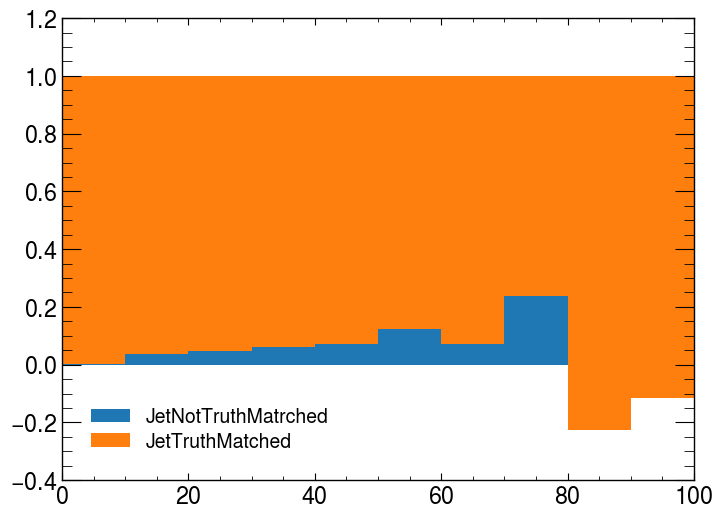

In [53]:
bin_centers = (mu_bins[1:] + mu_bins[:-1]) / 2 
bin_width = mu_bins[1] - mu_bins[0]
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(bin_centers, height=frac[:,0], width=bin_width, bottom=np.zeros_like(frac[:,0]), align='center', label='JetNotTruthMatrched')
plt.bar(bin_centers, height=frac[:,1], width=bin_width, bottom=frac[:,0], align='center', label='JetTruthMatched')
plt.legend()

### TruthType

The `TruthType` definition is:
``` cpp
      m_TruthType = -1;
      if(eventPtr->isMC){
        m_TruthType = eventPtr->Lep1.truthMatched * 2*2 + eventPtr->Lep2.truthMatched * 2 + eventPtr->Lep3.truthMatched;
      }

```

It's similar to the Linux priviledge scheme, 4 + 2 + 1 = 7  
```
1: Only the 3rd Lep is truth Matched   
2: Only the 2nd Lep is truth Matched   
4: Only the 1st Lep is truth Matched   
5: the 1st and the 3rd Leps are truth Matched  
6: the 1st and the 2nd Leps are truth Matched   
7: all three leptons are truth Matched     
```

# peak study 

In [ ]:
feature = 'ZetaLep'

In [ ]:
feature_min = merged_sig[feature].min()
feature_max = merged_sig[feature].max()

feature_bins = np.linspace(feature_min, feature_max, 101)
sig_bin_contents, sig_bin_edges = np.histogram(
    merged_sig[feature],
    bins=feature_bins,
    density=True,
    weights=merged_sig["WeightNormalized"],
)


In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(feature_min, feature_max)
hep.histplot(
    sig_bin_contents, sig_bin_edges, label="Signal", ax=ax, color="red"
)

In [ ]:
np.where(sig_bin_edges>=0)[0]

In [ ]:
idx = 60

In [ ]:
sig_bin_contents[59]

In [ ]:
sig_bin_contents[60]

In [ ]:
sig_bin_edges[61]

In [ ]:
sel = merged_sig.loc[(merged_sig['ZetaLep']>=sig_bin_edges[idx]) & (merged_sig['ZetaLep']<= sig_bin_edges[idx+1])]

In [ ]:
sel_lastbin = merged_sig.loc[(merged_sig['ZetaLep']>=sig_bin_edges[idx-1]) & (merged_sig['ZetaLep']<= sig_bin_edges[idx])]
sel_nextbin = merged_sig.loc[(merged_sig['ZetaLep']>=sig_bin_edges[idx+1]) & (merged_sig['ZetaLep']<= sig_bin_edges[idx+2])]

In [ ]:
len(sel_lastbin)

In [ ]:
len(sel_nextbin)

In [ ]:
sel['ZetaLep']

In [ ]:
plt.hist(sel['ZetaLep'], bins=100)

In [ ]:
len(sel) / len(merged_sig) 

In [ ]:
len(sel)

In [ ]:
len(merged_sig)

In [ ]:
bin_width = sig_bin_edges[1] - sig_bin_edges[0]

In [ ]:
np.sum(sel['WeightNormalized']) / merged_sig['WeightNormalized'].sum() / bin_width

In [ ]:
np.max(sel['WeightNormalized'])

In [ ]:
np.min(sel['WeightNormalized'])

``` cpp
     if(var=="ZetaLep"){
       double deltaEtaMinus = min((eventPtr->Lep3.p4).Eta(),min((eventPtr->Lep1.p4).Eta(),(eventPtr->Lep2.p4).Eta())) - min((eventPtr->jets.at(eventPtr->nGoodJets-1).p4).Eta(),(eventPtr->jets.at(eventPtr->nGoodJets-2).p4).Eta());
       double deltaEtaPlus = max((eventPtr->jets.at(eventPtr->nGoodJets-1).p4).Eta(),(eventPtr->jets.at(eventPtr->nGoodJets-2).p4).Eta()) - max((eventPtr->Lep3.p4).Eta(),max((eventPtr->Lep1.p4).Eta(),(eventPtr->Lep2.p4).Eta()));
       returnValue = min(deltaEtaMinus,deltaEtaPlus);
     }

```

In [ ]:
merged_sig_by_MC = merged_sig.groupby('isMC')
for MC_idx, MC_df in merged_sig_by_MC:
    sig_bin_contents, sig_bin_edges = np.histogram(
        merged_sig[feature],
        bins=feature_bins,
        density=True,
        weights=merged_sig["WeightNormalized"],
    )

    fig, ax = plt.subplots()
    ax.set_xlim(feature_min, feature_max)
    hep.histplot(
        sig_bin_contents, sig_bin_edges, label=f"{MC_idx} Signal", ax=ax, color="red"
    )

    ax.legend()


# Calculate Zeta by myself 

In [ ]:
delta_min = merged_sig[['Lep1Eta', 'Lep2Eta', 'Lep3Eta']].min(axis=1) - merged_sig[['Jet1Eta', 'Jet2Eta']].min(axis=1)
delta_max = merged_sig[['Jet1Eta', 'Jet2Eta']].max(axis=1) - merged_sig[['Lep1Eta', 'Lep2Eta', 'Lep3Eta']].max(axis=1)
merged_sig['Zeta_hr'] = pd.concat([delta_min, delta_max], axis=1, keys=['delta_min', 'delta_max']).min(axis=1)


In [ ]:
np.allclose(merged_sig['ZetaLep'], merged_sig['Zeta_hr'])

In [ ]:
sig_m450 = merged_sig_by_MC.get_group(450770)

In [ ]:
delta_min = sig_m450[['Lep1Eta', 'Lep2Eta', 'Lep3Eta']].min(axis=1) - sig_m450[['Jet1Eta', 'Jet2Eta']].min(axis=1)
delta_max = sig_m450[['Jet1Eta', 'Jet2Eta']].max(axis=1) - sig_m450[['Lep1Eta', 'Lep2Eta', 'Lep3Eta']].max(axis=1)


In [ ]:
sig_m450['Zeta_hr'] = pd.concat([delta_min, delta_max], axis=1, keys=['delta_min', 'delta_max']).min(axis=1)

In [ ]:
sig_m450[['Lep1Eta', 'Lep2Eta', 'Lep3Eta']]

In [55]:
merged_sig.columns

Index(['Yields', 'isMC', 'Channel', 'Year', 'NormSF', 'WeightSign',
       'WeightNormalized', 'Weight', 'M_WZ', 'M_123', 'Mt_WZ', 'M_Z', 'Mt_W',
       'Met', 'Njets', 'NBjets', 'SumOfWeight', 'Luminosity', 'CrossSection',
       'WZInclusiveLoose', 'WZInclusive', 'WZqqSR', 'WZqqCR', 'WZVBSSR',
       'WZVBSCR', 'ZfakeElCR', 'ZfakeMuCR', 'ZfakeCR', 'TopElCR', 'TopMuCR',
       'TopCR', 'ZZCR', 'EventNumber', 'AvMu', 'M_jj', 'Deta_jj', 'DY_jj',
       'Dphi_jj', 'PtBalanceZ', 'PtBalanceW', 'ZetaLep', 'Sum3Pt', 'Pt_123',
       'Pt_WZ', 'Pt_W', 'Pt_Z', 'Eta_W', 'Eta_Z', 'LTcode', 'TruthType',
       'genMass', 'Jet1Pt', 'Jet2Pt', 'Jet3Pt', 'Jet1Eta', 'Jet2Eta',
       'Jet3Eta', 'Jet1Phi', 'Jet2Phi', 'Jet3Phi', 'Jet1E', 'Jet2E', 'Jet3E',
       'Jet1Y', 'Jet2Y', 'Jet3Y', 'Jet1Truth', 'Jet2Truth', 'Jet3Truth',
       'Lep1Pt', 'Lep2Pt', 'Lep3Pt', 'Lep1Eta', 'Lep2Eta', 'Lep3Eta',
       'Lep1Phi', 'Lep2Phi', 'Lep3Phi', 'Lep1Charge', 'Lep2Charge',
       'Lep3Charge', 'Lep1D0Sig', 'Lep2D0S

In [56]:
merged_sig['Lep1R'] = np.sqrt(merged_sig['Lep1Eta']**2 + merged_sig['Lep1Phi']**2)
merged_sig['Lep2R'] = np.sqrt(merged_sig['Lep2Eta']**2 + merged_sig['Lep2Phi']**2)
merged_sig['Lep3R'] = np.sqrt(merged_sig['Lep3Eta']**2 + merged_sig['Lep3Phi']**2)

merged_sig['Jet1R'] = np.sqrt(merged_sig['Jet1Eta']**2 + merged_sig['Jet1Phi']**2)
merged_sig['Jet2R'] = np.sqrt(merged_sig['Jet2Eta']**2 + merged_sig['Jet2Phi']**2)


In [57]:
merged_sig['dR_Lep1_Jet1'] = np.abs(merged_sig['Lep1R'] - merged_sig['Jet1R'])
merged_sig['dR_Lep1_Jet2'] = np.abs(merged_sig['Lep1R'] - merged_sig['Jet2R'])
merged_sig['dR_Lep2_Jet1'] = np.abs(merged_sig['Lep2R'] - merged_sig['Jet1R'])
merged_sig['dR_Lep2_Jet2'] = np.abs(merged_sig['Lep2R'] - merged_sig['Jet2R'])
merged_sig['dR_Lep3_Jet1'] = np.abs(merged_sig['Lep3R'] - merged_sig['Jet1R'])
merged_sig['dR_Lep3_Jet2'] = np.abs(merged_sig['Lep3R'] - merged_sig['Jet2R'])


In [59]:
merged_sig[['dR_Lep1_Jet1', 'dR_Lep1_Jet2', 'dR_Lep2_Jet1', 'dR_Lep2_Jet2', 'dR_Lep3_Jet1', 'dR_Lep3_Jet2']]

,dR_Lep1_Jet1,dR_Lep1_Jet2,dR_Lep2_Jet1,dR_Lep2_Jet2,dR_Lep3_Jet1,dR_Lep3_Jet2
3,2.729578,0.401066,3.180768,0.852255,1.972422,0.356090
11,2.064535,1.158581,0.334550,0.571404,2.667006,1.761051
14,2.569289,3.618850,0.904761,1.954321,1.237123,2.286684
16,2.732799,0.010870,3.619586,0.897657,1.685784,1.036144
22,0.837969,1.102176,1.728708,1.992915,1.633997,1.898204
...,...,...,...,...,...,...
136522,2.266838,2.749968,1.800798,2.283928,1.275032,1.758162
136524,0.554781,0.910646,0.786864,0.678563,1.980840,0.515413
136525,4.088717,3.461045,4.556480,3.928808,1.694736,1.067064
136527,3.164472,1.839000,3.408416,2.082944,2.324828,0.999356


In [61]:
merged_sig['min_dR'] = np.min(merged_sig[['dR_Lep1_Jet1', 'dR_Lep1_Jet2', 'dR_Lep2_Jet1', 'dR_Lep2_Jet2', 'dR_Lep3_Jet1', 'dR_Lep3_Jet2']], axis=1)

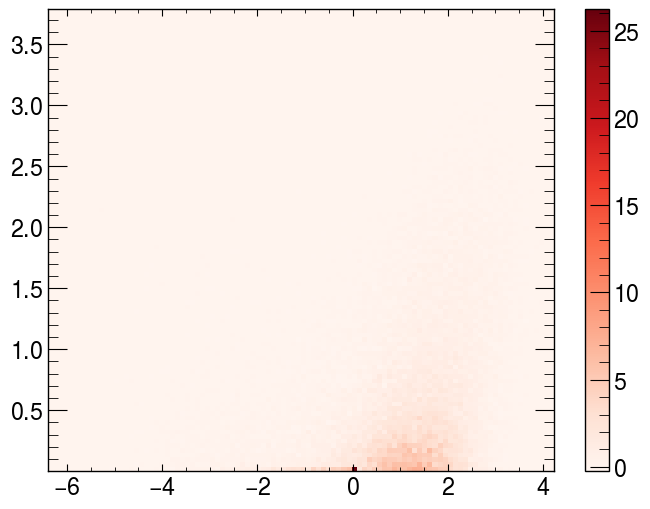

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist2d(merged_sig['ZetaLep'], merged_sig['min_dR'], bins=100, weights=merged_sig['WeightNormalized'], cmap=plt.cm.Reds)
plt.colorbar()
plt.show()